In [1]:
# YOU MUST USE 3.6.0 AND ABOVE FOR RUNNING GLMNET
#install.packages("psycho")
#install.packages("zoo")
#install.packages("scales")
#install.packages("rlang")
#install.packages("tidyverse")

#install.packages('lm.beta')
#install.packages("standardize")
library(data.table)
library("rvest")

library("zoo")
library("dplyr")

library(tidyverse)
library(caret)
library("lm.beta")
library("psycho")

library("standardize")
library("glmnet")
#install.packages("doParallel")
library("doParallel")
#install.packages("foreach")
#install.packages("pROC")
library("foreach")
library("pROC")

        
        
        rm(list=ls())
gc()

Warning message:
“package ‘rvest’ was built under R version 3.6.1”Loading required package: xml2
Warning message:
“package ‘xml2’ was built under R version 3.6.1”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ stringr 1.4.0
✔ tidyr   1.0.0     ✔ forcats 0.4.0
✔ readr   1.3.1     
Warning message:
“package ‘tibble’ was built under R version 3.6.1”Warning message:
“package ‘stringr’ was built under R version 3.6.1”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::betwee

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2210423,118.1,3691217,197.2,3691217,197.2
Vcells,3673540,28.1,8388608,64.0,5915600,45.2


In [2]:
start_time <- Sys.time()
new_data=fread("num_slim_data6.csv")

end_time <- Sys.time()

end_time - start_time
dim(new_data)
start_time <- Sys.time()
scale_data=fread("num_slim_data_scale6.csv")

end_time <- Sys.time()

end_time - start_time
dim(scale_data)

Time difference of 7.289043 secs

[1] 478174    159

Time difference of 13.95765 secs

[1] 478174    159

In [3]:
grep("count",colnames(new_data))
grep("count",colnames(scale_data))

[1] 159

[1] 159

In [4]:
coeff=NULL
sum=NULL
model=NULL
r=NULL
beta=NULL
for (i in 1:159){
   
   model[[i]] <- lm(data=scale_data,formula = count ~ scale_data[[i]] )
   coeff[[i]]=model$coefficients
   sum[[i]]=summary(model[[i]])
    r[[i]]=sum[[i]]$adj.r.squared
    beta[[i]]=lm.beta(model[[i]])
}







Warning message in summary.lm(model[[i]]):
“essentially perfect fit: summary may be unreliable”

In [5]:
new_beta=NULL
for (i in 1:159){
    new_beta[i]=abs(beta[[i]]$`standardized.coefficients`[2])
}

In [6]:
print(names(scale_data))

  [1] "eid"        "34-0.0"     "46-0.0"     "47-0.0"     "48-0.0"    
  [6] "49-0.0"     "50-0.0"     "51-0.0"     "92-0.0"     "96-0.0"    
 [11] "102-0.0"    "129-0.0"    "130-0.0"    "135-0.0"    "137-0.0"   
 [16] "189-0.0"    "699-0.0"    "709-0.0"    "874-0.0"    "894-0.0"   
 [21] "1269-0.0"   "1279-0.0"   "1289-0.0"   "1299-0.0"   "1309-0.0"  
 [26] "1319-0.0"   "1438-0.0"   "1458-0.0"   "1488-0.0"   "1528-0.0"  
 [31] "1737-0.0"   "1807-0.0"   "2139-0.0"   "2149-0.0"   "2217-0.0"  
 [36] "2277-0.0"   "3061-0.0"   "3062-0.0"   "3063-0.0"   "3064-0.0"  
 [41] "4079-0.0"   "4080-0.0"   "20010-0.0"  "20011-0.0"  "20015-0.0" 
 [46] "20074-0.0"  "20075-0.0"  "20256-0.0"  "20257-0.0"  "20258-0.0" 
 [51] "21001-0.0"  "21002-0.0"  "21003-0.0"  "21022-0.0"  "22034-0.0" 
 [56] "22037-0.0"  "22038-0.0"  "22039-0.0"  "22702-0.0"  "22704-0.0" 
 [61] "23098-0.0"  "23099-0.0"  "23100-0.0"  "23101-0.0"  "23102-0.0" 
 [66] "23106-0.0"  "23107-0.0"  "23108-0.0"  "23109-0.0"  "23110-0.0" 
 [71] 

In [7]:
ls()

[1] "beta"       "coeff"      "end_time"   "i"          "model"     
 [6] "new_beta"   "new_data"   "r"          "scale_data" "start_time"
[11] "sum"

In [8]:
print(r)

  [1]  6.743052e-06  5.192070e-04  8.421712e-04  7.720492e-04  2.485185e-02
  [6]  1.059631e-02  2.958415e-03  2.240903e-03  2.034482e-05  5.614178e-04
 [11]  2.646213e-02  1.321866e-05  7.107046e-05  1.196530e-02  1.554169e-02
 [16]  4.090645e-03  1.495854e-04  1.121317e-03  1.037733e-05 -2.076157e-06
 [21]  1.972473e-04  1.525301e-04  2.759476e-04  6.277053e-04  1.817718e-03
 [26]  2.904750e-04  6.424843e-04  2.029381e-03  2.771782e-04  1.528432e-04
 [31]  9.354626e-05  8.163664e-04  1.002846e-03  2.101888e-05  5.809174e-05
 [36]  1.718920e-06  4.708644e-06  5.545848e-03  8.072290e-03  3.314762e-03
 [41]  2.606167e-03  3.710246e-03  4.853718e-06  1.228895e-04  1.528293e-03
 [46]  4.086969e-05  2.047144e-06  9.924746e-03  7.517161e-03  2.117073e-03
 [51]  2.380052e-02  1.011906e-02  7.316048e-04  7.314976e-04  8.699131e-04
 [56]  1.533810e-04  2.498545e-04  1.297387e-03  4.724463e-05  1.847291e-06
 [61]  9.838431e-03  1.115686e-02  1.840749e-02  5.683027e-04  5.862731e-04
 [66]  2.197

In [9]:
r_square=(cbind(as.character(names(scale_data)),r))
colnames(r_square)=c("variable","adj-r")


In [10]:
r_square=as.data.frame(r_square,stringsAsFactors = F)
dim(r_square)


[1] 159   2

In [11]:
r_square$`adj-r`=as.double(r_square$`adj-r`)
head(r_square)
range(r_square$`adj-r`)
which(r_square$`adj-r`<0)
r_square[c(which(r_square$`adj-r`<0)),]

variable,adj-r
<chr>,<dbl>
eid,6.743052e-06
34-0.0,5.192070e-04
46-0.0,8.421712e-04
47-0.0,7.720492e-04
48-0.0,2.485185e-02
49-0.0,1.059631e-02


[1] -2.076157e-06  1.000000e+00

[1]  20 100 101 107 108 109 118 128 133 137 140 142 149 152 155 158

,variable,adj-r
,<chr>,<dbl>
20,894-0.0,-2.076157e-06
100,24012-0.0,-1.941821e-06
101,24013-0.0,-9.283905e-07
107,24020-0.0,-1.744890e-06
108,24021-0.0,-1.742160e-06
109,24022-0.0,-1.745138e-06
118,24508-0.0,-1.879992e-06
128,22009-0.10,-1.620699e-06
133,22009-0.15,-1.493388e-06


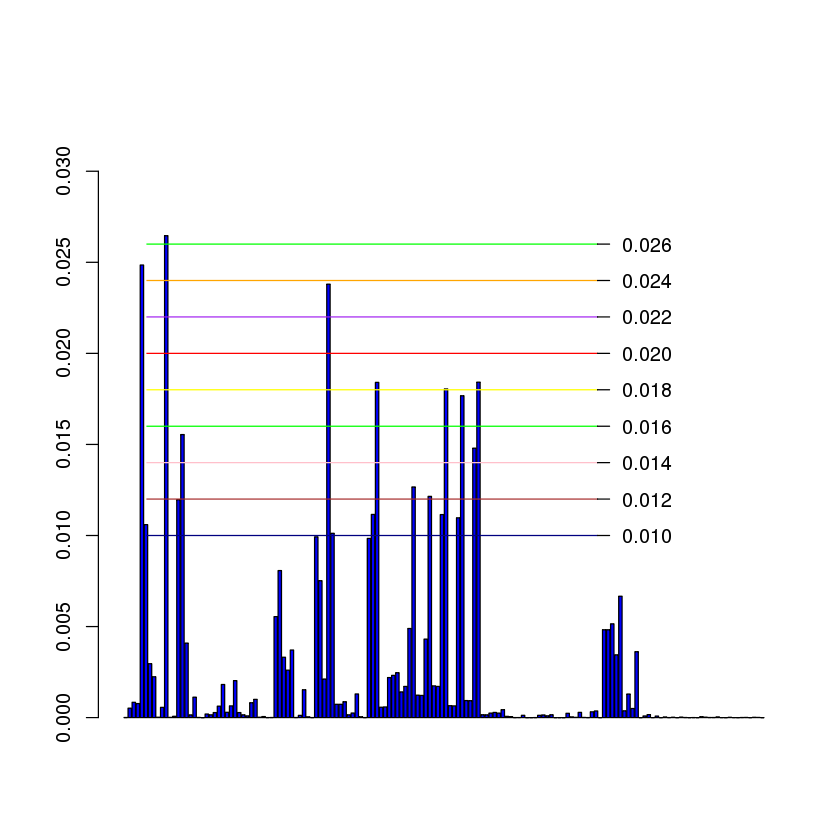

In [12]:
barplot(r_square$`adj-r`[-159],col="blue",ylim=c(0,0.034),horiz = F)
par(mar=c(5,6,10,10)+.1)
abline(h = 0.026,col="green")
abline(h = 0.024,col="orange")
abline(h = 0.022,col="purple")
abline(h = 0.020,col="red")
abline(h = 0.018,col="yellow")
abline(h = 0.016,col="green")
abline(h = 0.014,col="pink")
abline(h = 0.012,col="brown")
abline(h = 0.010,col="navy")
axis(4, at=0.026,labels=0.026,las=2)
axis(4, at=0.024,labels=0.024,las=2)
axis(4, at=0.022,labels=0.022,las=2)
axis(4, at=0.020,labels="0.020",las=2)
axis(4, at=0.018,labels=0.018,las=2)
axis(4, at=0.016,labels=0.016,las=2)
axis(4, at=0.014,labels=0.014,las=2)
axis(4, at=0.012,labels=0.012,las=2)
axis(4, at=0.0100,labels="0.010",las=2)

In [13]:

which(r_square$`adj-r`>=0.026 & r_square$`adj-r` < 1 ) %>% print()
which(r_square$`adj-r` >= 0.024 & r_square$`adj-r` < 0.026) %>% print()
which(r_square$`adj-r` >= 0.022 & r_square$`adj-r` < 0.024) %>% print()
which(r_square$`adj-r` >= 0.020 & r_square$`adj-r` < 0.022) %>% cat("[1] None" ,.,"\n")
which(r_square$`adj-r` >= 0.018 & r_square$`adj-r` < 0.020) %>% print()
which(r_square$`adj-r` >= 0.016 & r_square$`adj-r` < 0.018) %>% print()
which(r_square$`adj-r` >= 0.014 & r_square$`adj-r` < 0.016) %>% print()
which(r_square$`adj-r` >= 0.012 & r_square$`adj-r` < 0.014) %>% print()
which(r_square$`adj-r` >= 0.010 & r_square$`adj-r` < 0.012) %>% print()

[1] 11
[1] 5
[1] 51
[1] None  
[1] 63 80 88
[1] 84
[1] 15 87
[1] 72 76
[1]  6 14 52 62 79 83


In [14]:
r_square[c(11,5,51,63,80,88,84,15,87,72,76,6,14,52,62,79,83),]

,variable,adj-r
,<chr>,<dbl>
11,102-0.0,0.02646213
5,48-0.0,0.02485185
51,21001-0.0,0.02380052
63,23100-0.0,0.01840749
80,23120-0.0,0.01804599
88,23128-0.0,0.01842018
84,23124-0.0,0.01767267
15,137-0.0,0.01554169
87,23127-0.0,0.01479506


In [15]:
ls()

[1] "beta"       "coeff"      "end_time"   "i"          "model"     
 [6] "new_beta"   "new_data"   "r"          "r_square"   "scale_data"
[11] "start_time" "sum"

In [16]:
range_table=sapply(new_data,range)

In [17]:
which(range_table[1,]==-3) %in% c(11,5,51,63,80,88,84,15,87,72,76,6,14,52,62,79,83)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE

In [18]:
which(range_table[1,]==-3) 

92-0.0   709-0.0   874-0.0   894-0.0  1269-0.0  1279-0.0  1737-0.0  1807-0.0 
        9        18        19        20        21        22        31        32 
 2139-0.0  2149-0.0  2217-0.0 20010-0.0 20011-0.0 
       33        34        35        43        44

In [19]:
new_beta[5]
sum[5]

[1] 0.1576512

[[1]]

Call:
lm(formula = count ~ scale_data[[i]], data = scale_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.507  -0.577  -0.107   0.446 180.473 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.201e-16  1.428e-03     0.0        1    
scale_data[[i]] 1.577e-01  1.428e-03   110.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9875 on 478172 degrees of freedom
Multiple R-squared:  0.02485,	Adjusted R-squared:  0.02485 
F-statistic: 1.219e+04 on 1 and 478172 DF,  p-value: < 2.2e-16



In [27]:
coe=(cbind(as.character(names(scale_data)),new_beta))
colnames(coe)=c("variable","coe")


coe=as.data.frame(coe,stringsAsFactors = F)
dim(coe)




coe$coe=as.double(coe$coe)
head(coe)


[1] 159   2

variable,coe
<chr>,<dbl>
eid,0.00297226
34-0.0,0.02283193
46-0.0,0.02905616
47-0.0,0.02782335
48-0.0,0.15765118
49-0.0,0.10294843


In [28]:
range(coe$coe)

[1] 0.0001230491 1.0000000000

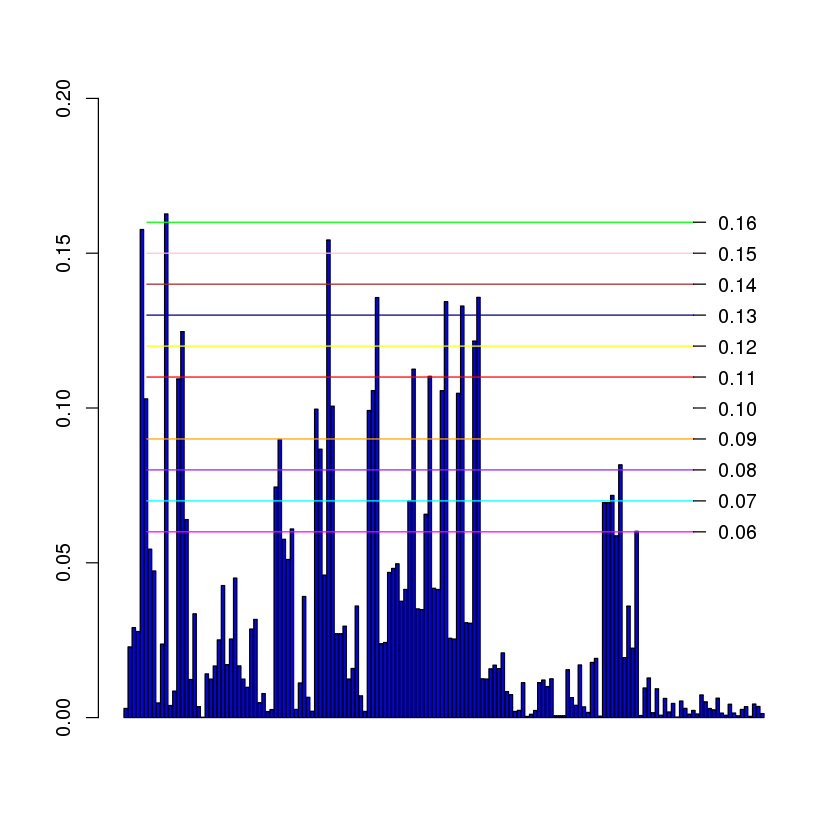

In [29]:

barplot(coe$coe[-159],col="blue",ylim=c(0,0.20),horiz = F)
par(mar=c(5,6,1,6)+.1)



abline(h = 0.16,col="green")
abline(h = 0.15,col="pink")
abline(h = 0.14,col="brown")
abline(h = 0.13,col="navy")
abline(h = 0.12,col="yellow")
abline(h = 0.11,col="red")
abline(h = 0.09,col="orange")
abline(h = 0.08,col="purple")
abline(h = 0.07,col="cyan")
abline(h = 0.06,col="magenta")
axis(4, at=0.16,labels=0.16,las=2)
axis(4, at=0.15,labels=0.15,las=2)
axis(4, at=0.14,labels=0.14,las=2)
axis(4, at=0.13,labels=0.13,las=2)
axis(4, at=0.12,labels=0.12,las=2)
axis(4, at=0.11,labels=0.11,las=2)
axis(4, at=0.100,labels="0.10",las=2)
axis(4, at=0.09,labels=0.09,las=2)
axis(4, at=0.08,labels=0.08,las=2)
axis(4, at=0.07,labels=0.07,las=2)
axis(4, at=0.06,labels=0.06,las=2)

In [30]:

which(r_square$`adj-r`>=0.026 & r_square$`adj-r` < 1 ) %>% print()
which(r_square$`adj-r` >= 0.024 & r_square$`adj-r` < 0.026) %>% print()
which(r_square$`adj-r` >= 0.022 & r_square$`adj-r` < 0.024) %>% print()
which(r_square$`adj-r` >= 0.020 & r_square$`adj-r` < 0.022) %>% cat("[1] None" ,.,"\n")
which(r_square$`adj-r` >= 0.018 & r_square$`adj-r` < 0.020) %>% print()
which(r_square$`adj-r` >= 0.016 & r_square$`adj-r` < 0.018) %>% print()
which(r_square$`adj-r` >= 0.014 & r_square$`adj-r` < 0.016) %>% print()
which(r_square$`adj-r` >= 0.012 & r_square$`adj-r` < 0.014) %>% print()
which(r_square$`adj-r` >= 0.010 & r_square$`adj-r` < 0.012) %>% print()

[1] 11
[1] 5
[1] 51
[1] None  
[1] 63 80 88
[1] 84
[1] 15 87
[1] 72 76
[1]  6 14 52 62 79 83


In [79]:
head(new_data[1,c(11,5,51,63,80,88,84,15,87,72,76,6,14,52,62,79,83)])

102-0.0,48-0.0,21001-0.0,23100-0.0,23120-0.0,23128-0.0,23124-0.0,137-0.0,23127-0.0,23112-0.0,23116-0.0,49-0.0,135-0.0,21002-0.0,23099-0.0,23119-0.0,23123-0.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
59,78,24.022,21,1,10.4,1,3,28.9,4.4,4.3,100,2,65.4,32,30.7,30.6


In [31]:
which(coe$coe>=0.16 & coe$coe < 1 ) %>% print()
which(coe$coe>=0.15 & coe$coe < 0.16 ) %>% print()
which(coe$coe>=0.14 & coe$coe < 0.15 ) %>% cat("[1] None" ,.,"\n")
which(coe$coe>=0.13 & coe$coe < 0.14 ) %>% print()
which(coe$coe>=0.12 & coe$coe < 0.13 ) %>% print()
which(coe$coe>=0.11 & coe$coe < 0.12 ) %>% print()
which(coe$coe>=0.10 & coe$coe < 0.11 ) %>% print()
which(coe$coe>=0.09 & coe$coe < 0.10 ) %>% print()
which(coe$coe>=0.08 & coe$coe < 0.09 ) %>% print()
which(coe$coe>=0.07 & coe$coe < 0.08 ) %>% print()
which(coe$coe>=0.06 & coe$coe < 0.07 ) %>% print()

[1] 11
[1]  5 51
[1] None  
[1] 63 80 84 88
[1] 15 87
[1] 72 76
[1]  6 14 52 62 79 83
[1] 48 61
[1]  39  49 123
[1]  38 121
[1]  16  42  71  75 119 120 127


In [110]:
print(names(new_data[1,c(11,5,51,63,80,84,88,15,87,72,76,6,14,52,62,79,83,48,61,39,  49 ,123,38 ,121,16,42,71,75,119,120,127)]))

 [1] "102-0.0"   "48-0.0"    "21001-0.0" "23100-0.0" "23120-0.0" "23124-0.0"
 [7] "23128-0.0" "137-0.0"   "23127-0.0" "23112-0.0" "23116-0.0" "49-0.0"   
[13] "135-0.0"   "21002-0.0" "23099-0.0" "23119-0.0" "23123-0.0" "20256-0.0"
[19] "23098-0.0" "3063-0.0"  "20257-0.0" "26414-0.0" "3062-0.0"  "26412-0.0"
[25] "189-0.0"   "4080-0.0"  "23111-0.0" "23115-0.0" "26410-0.0" "26411-0.0"
[31] "22009-0.1"


1. Pulse rate, automated reading
2. Waist circumference
3. Body mass index (BMI)
4. Whole body fat mass
5. Arm fat mass (right)
6. Arm fat mass (left)


7. Trunk fat mass
8. Number of treatments/medications taken
9. Trunk fat percentage
10. Leg fat mass (right)
11. Leg fat mass (left)
12. Hip circumference


13. Number of self-reported non-cancer illnesses
14. Weight (52,21002-0.0)
15. Body fat percentage
16. Arm fat percentage (right)
17. Arm fat percentage (left) (83)
18. Forced expiratory volume in 1-second (FEV1) Z-score


19. Weight (61, 23098-0.0)
20. Forced expiratory volume in 1-second (FEV1)
21. Forced vital capacity (FVC) Z-score
22. Education score (England)
23. Forced vital capacity (FVC)
24. Employment score (England)


25. Townsend deprivation index at recruitment
26. Systolic blood pressure, automated reading
27. Leg fat percentage (right)
28. Leg fat percentage (left)
29. Index of Multiple Deprivation (England)
30. Income score (England)
31. Genetic principal components




In [51]:
select_beta_data=new_data[,c(11,5,51,63,80,84,88,15,87,72,76,6,14,52,62,79,83,48,61,39,  49 ,123,38 ,121,16,42,71,75,119,120,127,159)]

In [53]:
select_beta_data_scale=scale_data[,c(11,5,51,63,80,84,88,15,87,72,76,6,14,52,62,79,83,48,61,39,  49 ,123,38 ,121,16,42,71,75,119,120,127,159)]

In [54]:
#fwrite(select_beta_data,"select_beta.csv")

In [55]:
#fwrite(select_beta_data_scale,"select_beta_scale.csv")

In [112]:
test=lm(data=select_beta_data_scale,formula=count~.)

In [114]:
options(scipen=1)
summary(test)


Call:
lm(formula = count ~ ., data = select_beta_data_scale)

Residuals:
    Min      1Q  Median      3Q     Max 
 -4.067  -0.548  -0.094   0.434 180.387 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.383e-16  1.391e-03   0.000 1.000000    
`102-0.0`    1.225e-01  1.435e-03  85.374  < 2e-16 ***
`48-0.0`     1.751e-01  3.515e-03  49.811  < 2e-16 ***
`21001-0.0`  1.673e-01  5.101e-03  32.787  < 2e-16 ***
`23100-0.0` -2.007e-02  1.869e-02  -1.074 0.282817    
`23120-0.0` -1.157e-02  1.758e-02  -0.658 0.510716    
`23124-0.0`  1.071e-02  1.663e-02   0.644 0.519641    
`23128-0.0`  1.751e-01  1.625e-02  10.774  < 2e-16 ***
`137-0.0`    4.463e-02  1.793e-03  24.897  < 2e-16 ***
`23127-0.0` -7.359e-02  1.498e-02  -4.913 8.98e-07 ***
`23112-0.0`  6.934e-02  2.646e-02   2.621 0.008778 ** 
`23116-0.0`  3.325e-02  2.746e-02   1.211 0.225865    
`49-0.0`    -9.443e-02  3.273e-03 -28.854  < 2e-16 ***
`135-0.0`    1.662e-02  1.773e-03   9.371  < 2e-16 ***
`210

In [117]:
options(scipen=999)
f_test=anova(test)
f_test=as.data.frame(f_test)

In [118]:
f_test[order(f_test$`F value`,decreasing = T),1:4]

,Df,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
`102-0.0`,1,12654.4488663,12654.4488663,13686.3909711
`48-0.0`,1,9031.9191963,9031.9191963,9768.4520793
`137-0.0`,1,2985.3887244,2985.3887244,3228.8405221
`22009-0.1`,1,2602.2552355,2602.2552355,2814.4633509
`20256-0.0`,1,1941.0927733,1941.0927733,2099.3845633
`49-0.0`,1,1430.6748773,1430.6748773,1547.3432253
`23127-0.0`,1,1338.0725460,1338.0725460,1447.1893802
`21002-0.0`,1,1329.3285213,1329.3285213,1437.7322998
`26414-0.0`,1,566.7515346,566.7515346,612.9688593


In [87]:
cor(select_beta_data)[1:31,1:2]

,102-0.0,48-0.0
102-0.0,1.00000000,0.13162061
48-0.0,0.13162061,1.00000000
21001-0.0,0.15216471,0.81170559
23100-0.0,0.17194083,0.64476254
23120-0.0,0.16332344,0.62497560
23124-0.0,0.16218407,0.62284610
23128-0.0,0.14823114,0.76214300
137-0.0,0.09639505,0.21283252
23127-0.0,0.16433682,0.42621473
23112-0.0,0.17635691,0.38088347


In [119]:
full_model=lm(data=scale_data,formula=count~.)

In [146]:
full_model %>% summary()


Call:
lm(formula = count ~ ., data = scale_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.940  -0.541  -0.090   0.432 180.429 

Coefficients:
                          Estimate            Std. Error t value
(Intercept)   0.000000000000001151  0.001382808833556671   0.000
eid          -0.002941696097145097  0.001383067503579167  -2.127
`34-0.0`      0.414327204026891494  0.015569616463094604  26.611
`46-0.0`      0.006121922478050597  0.003365868218289980   1.819
`47-0.0`      0.020017736608018973  0.003348906232980684   5.977
`48-0.0`      0.173811917534579724  0.003744963913829589  46.412
`49-0.0`     -0.075022489856627642  0.003373715181555926 -22.237
`50-0.0`     -0.128575068926043035  0.010898919136241903 -11.797
`51-0.0`     -0.011669965408335594  0.002773934206742649  -4.207
`92-0.0`     -0.003036690312336240  0.001493921819327089  -2.033
`96-0.0`     -0.004096555537810118  0.001483615589632224  -2.761
`102-0.0`     0.132181711102380112  0.001493015643655719  88.

In [149]:
options(scipen=999)
f_test_full=anova(full_model)
f_test_full=as.data.frame(f_test_full)
f_test_full[order(f_test_full$`F value`,decreasing = T)[1:20],c(1,4)]

,Df,F value
,<int>,<dbl>
`48-0.0`,1,15815.9529
`102-0.0`,1,8200.6461
`50-0.0`,1,4453.0428
`22009-0.1`,1,3285.2131
`135-0.0`,1,1651.6160
`3063-0.0`,1,1262.7327
`49-0.0`,1,1152.1183
`137-0.0`,1,1083.3928
`4080-0.0`,1,744.8029


In [150]:
best_f=f_test_full[order(f_test_full$`F value`,decreasing = T)[1:20],c(1,4)]

In [153]:
merge(name,best_f,by = id)

ERROR: Error in as.vector(x, mode): cannot coerce type 'closure' to vector of type 'any'


In [125]:
coe=coe[order(coe$coe[-159],decreasing = T),]

In [126]:
coe[1:31,]

,variable,coe
,<chr>,<dbl>
11,102-0.0,0.16267810
5,48-0.0,0.15765118
51,21001-0.0,0.15428079
88,23128-0.0,0.13572852
63,23100-0.0,0.13568175
80,23120-0.0,0.13434300
84,23124-0.0,0.13294633
15,137-0.0,0.12467459
87,23127-0.0,0.12164340


In [133]:
'1. Pulse rate, automated reading',
'2. Waist circumference',
'3. Body mass index (BMI)',
'4. Whole body fat mass',
'5. Arm fat mass (right)',
'6. Arm fat mass (left)',
'7. Trunk fat mass',
'8. Number of treatments/medications taken',
'9. Trunk fat percentage',
'10. Leg fat mass (right)',
'11. Leg fat mass (left)',
'12. Hip circumference',
'13. Number of self-reported non-cancer illnesses',
'14. Weight (52,21002-0.0)',
'15. Body fat percentage',
'16. Arm fat percentage (right)',
'17. Arm fat percentage (left) (83)',
'18. Forced expiratory volume in 1-second (FEV1) Z-score',
'19. Weight (61, 23098-0.0)',
'20. Forced expiratory volume in 1-second (FEV1)',
'21. Forced vital capacity (FVC) Z-score',
'22. Education score (England)',
'23. Forced vital capacity (FVC)',
'24. Employment score (England)',
'25. Townsend deprivation index at recruitment',
'26. Systolic blood pressure, automated reading',
'27. Leg fat percentage (right)',
'28. Leg fat percentage (left)',
'29. Index of Multiple Deprivation (England)',
'30. Income score (England)',
'31. Genetic principal components'





ERROR: Error in parse(text = x, srcfile = src): <text>:1:35: unexpected ','
1: '1. Pulse rate, automated reading',
                                      ^


In [136]:
name=read.csv("name.csv",header = F)

In [140]:
best_beta=cbind(name,coe[1:31,1:2])

In [142]:
colnames(best_beta)=c("variable_name","var-id","correlation")

In [145]:
fwrite(best_beta,"best_beta.csv")

In [33]:
which(range_table[1,]==-3) 

92-0.0   709-0.0   874-0.0   894-0.0  1269-0.0  1279-0.0  1737-0.0  1807-0.0 
        9        18        19        20        21        22        31        32 
 2139-0.0  2149-0.0  2217-0.0 20010-0.0 20011-0.0 
       33        34        35        43        44

In [34]:
51,63,80,84,88,15,87

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected ','
1: 51,
      ^


In [35]:
test2_model=lm(data=scale_data[,c(11,5,51,80,15,76,6,14,52,62,93,159)],formula=count~.)

In [36]:
vif(test2_model)

ERROR: Error in vif(test2_model): could not find function "vif"


In [ ]:
car::vif(model[[5]])

In [37]:
library(car)

Loading required package: carData
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Attaching package: ‘car’

The following object is masked from ‘package:purrr’:

    some

The following object is masked from ‘package:dplyr’:

    recode

